# Тема “Обучение без учителя”

**Задание 1**  
Импортируйте библиотеки pandas, numpy и matplotlib.  
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.  
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
boston.feature_names

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [2]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.shape

(506, 13)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))


Масштабируйте данные с помощью StandardScaler.


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

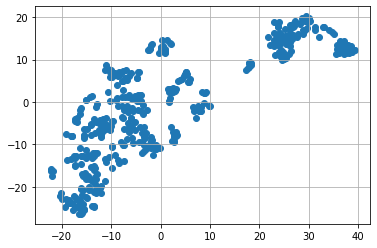

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.grid(True)
plt.show()

**Задание 2**  
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

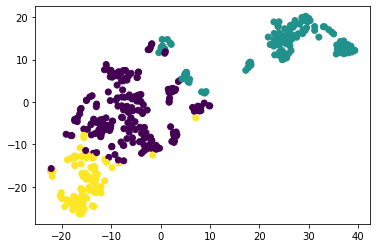

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [10]:
for idx in range(0,3):
    mean1 = y_train[labels_train == idx].mean()
    mean2 = X_train.loc[labels_train == idx, 'CRIM'].mean()
    print('\nКластер' , idx, 
          '\nCреднее значение price: ', float(mean1), 
          '\nCреднее значение CRIM: ', float(mean2))


Кластер 0 
Cреднее значение price:  24.958115183246072 
Cреднее значение CRIM:  0.42166020942408367

Кластер 1 
Cреднее значение price:  16.165354330708663 
Cреднее значение CRIM:  10.797028425196853

Кластер 2 
Cреднее значение price:  27.78837209302326 
Cреднее значение CRIM:  0.07356558139534886


***Задание 3**  
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [11]:
labels_test = kmeans.predict(X_test_scaled)

In [12]:
for idx in range(0,3):
    mean1 = y_test[labels_test == idx].mean()
    mean2 = X_test.loc[labels_test == idx, 'CRIM'].mean()
    print('\nКластер' , idx, 
          '\nCреднее значение price: ', float(mean1),
          '\nCреднее значение CRIM: ', float(mean2))


Кластер 0 
Cреднее значение price:  21.860784313725492 
Cреднее значение CRIM:  0.26607882352941176

Кластер 1 
Cреднее значение price:  16.43714285714286 
Cреднее значение CRIM:  10.165531142857143

Кластер 2 
Cреднее значение price:  31.35 
Cреднее значение CRIM:  0.062060000000000004
